In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:06<00:00, 27.8MB/s]
100% 163M/163M [00:06<00:00, 26.7MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [17]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_846.jpg', 'with_mask_2934.jpg', 'with_mask_2307.jpg', 'with_mask_3653.jpg', 'with_mask_1208.jpg']
['with_mask_3189.jpg', 'with_mask_2390.jpg', 'with_mask_2738.jpg', 'with_mask_750.jpg', 'with_mask_3051.jpg']


In [18]:
without_mask_files = os.listdir('/content/data/without_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_846.jpg', 'with_mask_2934.jpg', 'with_mask_2307.jpg', 'with_mask_3653.jpg', 'with_mask_1208.jpg']
['with_mask_3189.jpg', 'with_mask_2390.jpg', 'with_mask_2738.jpg', 'with_mask_750.jpg', 'with_mask_3051.jpg']


In [19]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [20]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [21]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [22]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [23]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

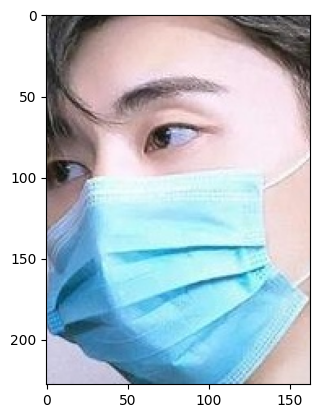

In [24]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

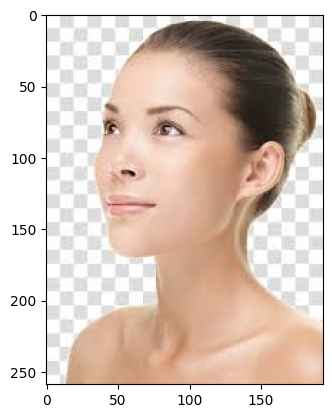

In [25]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

Resize the Images

Convert the images to numpy arrays

In [31]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [32]:
type(data)

list

In [33]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
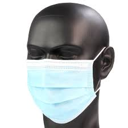

In [34]:
data[0]

In [35]:
type(data[0])

numpy.ndarray

In [36]:
data[0].shape

(128, 128, 3)

In [37]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [38]:
type(X)

numpy.ndarray

In [45]:
type(Y)

numpy.ndarray

In [46]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [47]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [50]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[182, 151, 110],
        [172, 146, 103],
        [164, 142, 100],
        ...,
        [  8,   3,   0],
        [  9,   4,   1],
        [ 11,   6,   3]],

       [[180, 150, 108],
        [174, 149, 106],
        [168, 146, 104],
        ...,
        [  7,   2,   0],
        [  9,   4,   1],
        [ 10,   5,   2]],

       [[178, 150, 108],
        [177, 152, 109],
        [171, 150, 108],
        ...,
        [  7,   2,   0],
        [  8,   3,   0],
        [ 10,   5,   2]],

       ...,

       [[217, 178, 116],
        [211, 176, 121],
        [155, 125,  81],
        ...,
        [ 73,  46,  22],
        [ 49,  27,   8],
        [ 30,  13,   0]],

       [[206, 168, 110],
        [209, 174, 120],
        [164, 133,  85],
        ...,
        [ 73,  45,  21],
        [ 50,  28,   8],
        [ 31,  14,   0]],

       [[195, 158,  99],
        [205, 171, 116],
        [173, 142,  94],
        ...,
        [ 75,  47,  23],
        [ 52,  30,  10],
        [ 33,  16,   1]]], dtype=uint8)
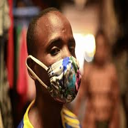

In [51]:
X_train[0]

In [52]:
X_train_scaled[0]

array([[[0.71372549, 0.59215686, 0.43137255],
        [0.6745098 , 0.57254902, 0.40392157],
        [0.64313725, 0.55686275, 0.39215686],
        ...,
        [0.03137255, 0.01176471, 0.        ],
        [0.03529412, 0.01568627, 0.00392157],
        [0.04313725, 0.02352941, 0.01176471]],

       [[0.70588235, 0.58823529, 0.42352941],
        [0.68235294, 0.58431373, 0.41568627],
        [0.65882353, 0.57254902, 0.40784314],
        ...,
        [0.02745098, 0.00784314, 0.        ],
        [0.03529412, 0.01568627, 0.00392157],
        [0.03921569, 0.01960784, 0.00784314]],

       [[0.69803922, 0.58823529, 0.42352941],
        [0.69411765, 0.59607843, 0.42745098],
        [0.67058824, 0.58823529, 0.42352941],
        ...,
        [0.02745098, 0.00784314, 0.        ],
        [0.03137255, 0.01176471, 0.        ],
        [0.03921569, 0.01960784, 0.00784314]],

       ...,

       [[0.85098039, 0.69803922, 0.45490196],
        [0.82745098, 0.69019608, 0.4745098 ],
        [0.60784314, 0

**Building a Convolutional Neural Networks (CNN)**

In [53]:
import tensorflow as tf
from tensorflow import keras

In [54]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [56]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - acc: 0.7115 - loss: 0.6278 - val_acc: 0.8942 - val_loss: 0.2566
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8795 - loss: 0.3072 - val_acc: 0.9008 - val_loss: 0.2583
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9086 - loss: 0.2515 - val_acc: 0.9157 - val_loss: 0.2226
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9128 - loss: 0.2032 - val_acc: 0.9140 - val_loss: 0.2354
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9434 - loss: 0.1608 - val_acc: 0.9140 - val_loss: 0.2208


**Model Evaluation**

In [57]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.9372 - loss: 0.1812
Test Accuracy = 0.9318332076072693


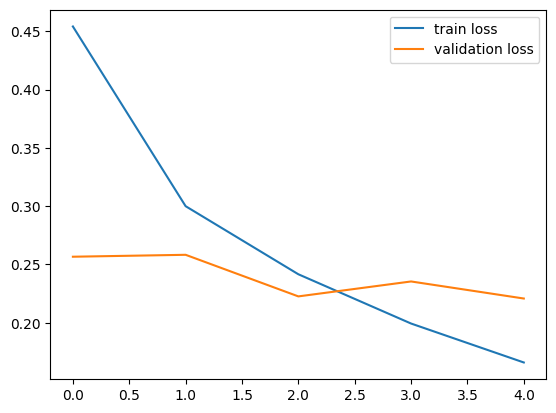

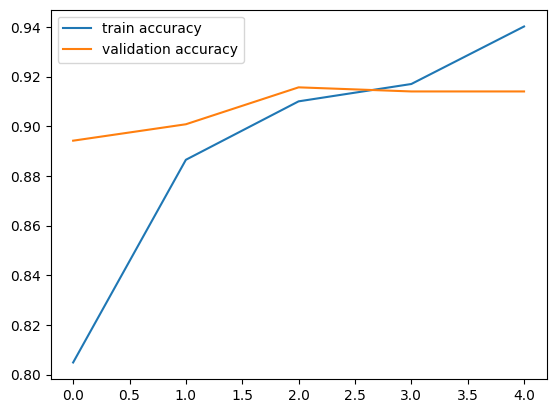

In [58]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/masktest1.jpg


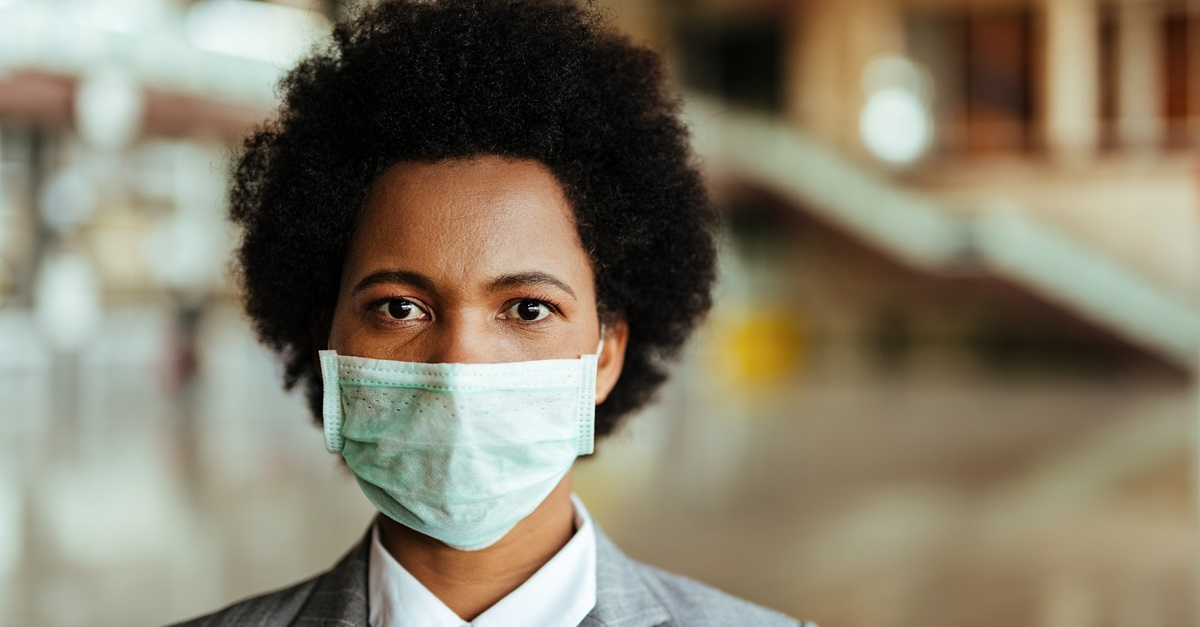

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
[[0.15602024 0.82898986]]
1
The person in the image is wearing a mask


In [61]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')